In [4]:
!pip install kaggle


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset"

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:41<00:00, 61.2MB/s]
100% 2.70G/2.70G [00:41<00:00, 69.7MB/s]


In [8]:
!unzip '/content/new-plant-diseases-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam

In [10]:
image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [11]:
train_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = "/content/test"

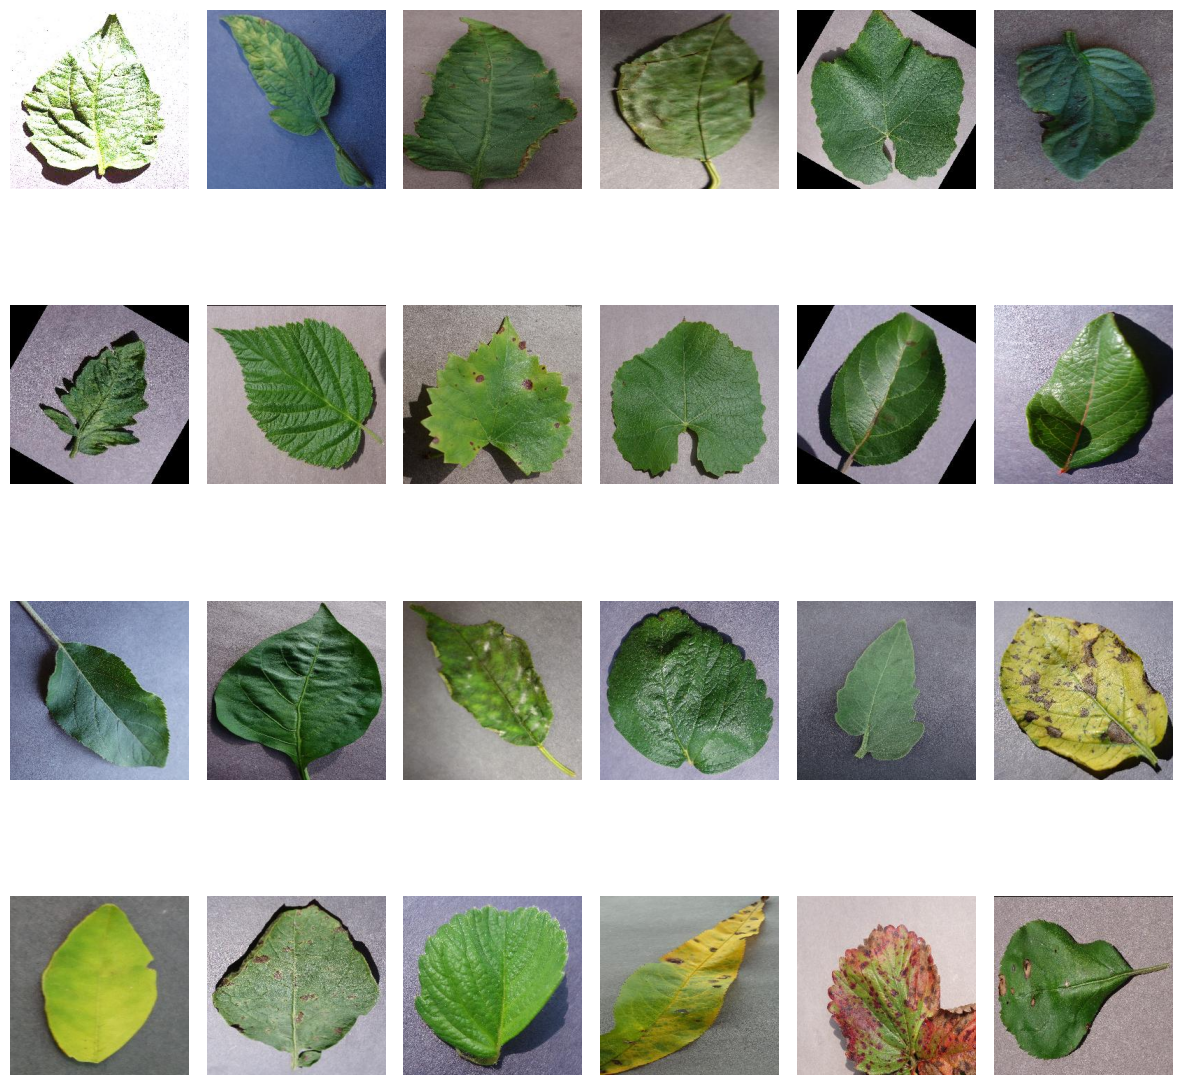

In [12]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [13]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [14]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [15]:
class_names = os.listdir(image_path)
print(class_names)

['Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_', 'Raspberry___healthy', 'Tomato___Septoria_leaf_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_mosaic_virus', 'Apple___Cedar_apple_rust', 'Peach___healthy', 'Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Apple___Apple_scab', 'Corn_(maize)___healthy', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Soybean___healthy', 'Peach___Bacterial_spot', 'Tomato___healthy', 'Tomato___Late_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Blueberry___healthy', 'Tomato___Target_Spot', 'Cherry_(including_sour)___healthy', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Tomato___Early_blight', 'Grape___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'

In [16]:
print("Number of classes : {}".format(len(class_names)))


Number of classes : 38


In [17]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(image_path+"/"+class_name))

images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])

<ipython-input-18-5265a1f170c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")


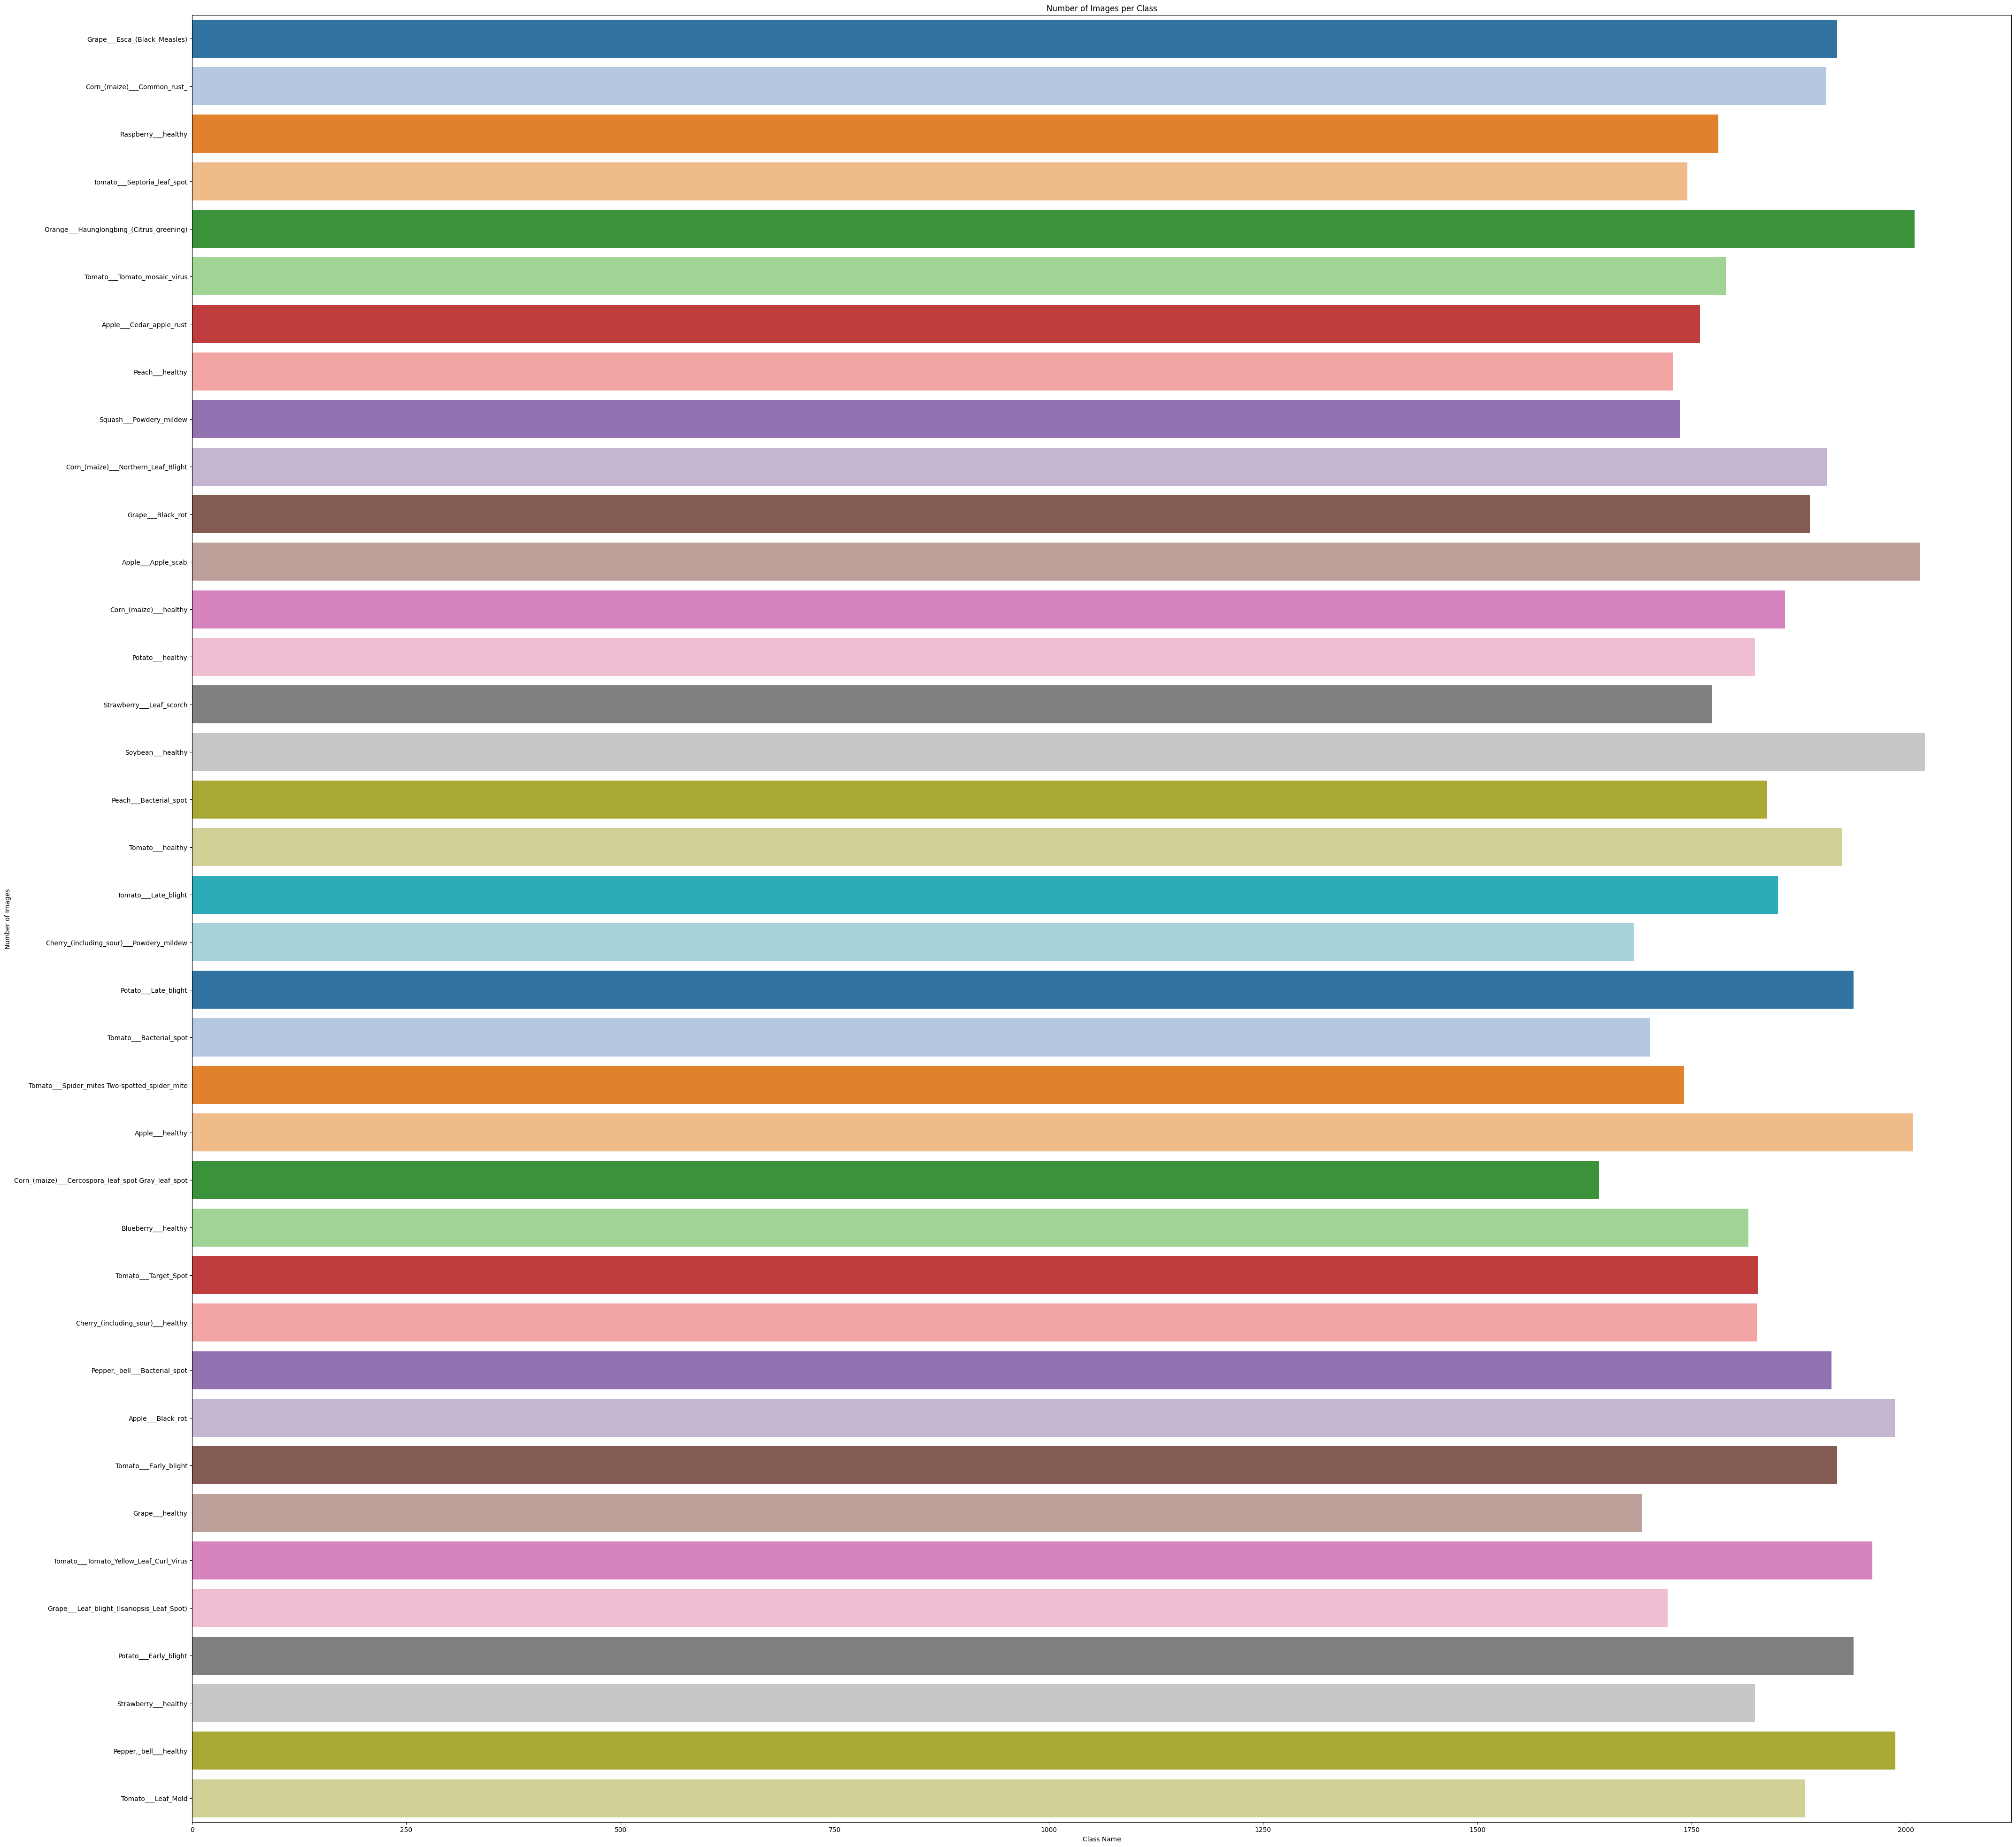

In [18]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [19]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 base model
base_model_inception = InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the first 10 layers
for layer in base_model_inception.layers[:10]:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(38, activation='softmax')(x)

# Create the final model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions)

# Compile the model
model_inception.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])







In [20]:
# Model summary
model_inception.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 23,939,910 (91.32 MB)

 Trainable params: 23,876,838 (91.08 MB)

 Non-trainable params: 63,072 (246.38 KB)

In [21]:
# Train the model
history = model_inception.fit(
    training_set,
    validation_data=validation_set,
    epochs=12,
    batch_size=32
)


Epoch 1/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 656s 262ms/step - accuracy: 0.7371 - loss: 0.9479 - val_accuracy: 0.9440 - val_loss: 0.1802
Epoch 2/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 548s 223ms/step - accuracy: 0.9593 - loss: 0.1324 - val_accuracy: 0.9756 - val_loss: 0.0816
Epoch 3/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 490s 223ms/step - accuracy: 0.9738 - loss: 0.0848 - val_accuracy: 0.9765 - val_loss: 0.0737
Epoch 4/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 503s 223ms/step - accuracy: 0.9812 - loss: 0.0624 - val_accuracy: 0.9671 - val_loss: 0.1316
Epoch 5/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 499s 222ms/step - accuracy: 0.9835 - loss: 0.0542 - val_accuracy: 0.9746 - val_loss: 0.0870
Epoch 6/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 501s 221ms/step - accuracy: 0.9883 - loss: 0.0402 - val_accuracy: 0.9785 - val_loss: 0.0765
Epoch 7/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 511s 225ms/step - accuracy: 0.9880 - loss: 0.0373 - val_accuracy: 0.9793 - val_loss: 0.0726
Epoch 8/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 501s 225ms/step - ac

In [22]:
# Evaluate the Training set accuracy
train_loss, train_acc = model_inception.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 66ms/step - accuracy: 0.9978 - loss: 0.0077
Training accuracy: 0.9981790781021118


In [23]:
#Validation set Accuracy
val_loss, val_acc = model_inception.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.9911 - loss: 0.0328
Validation accuracy: 0.9900409579277039


In [25]:
model_inception.save('InceptionNet_trained_plant_disease_model.keras')


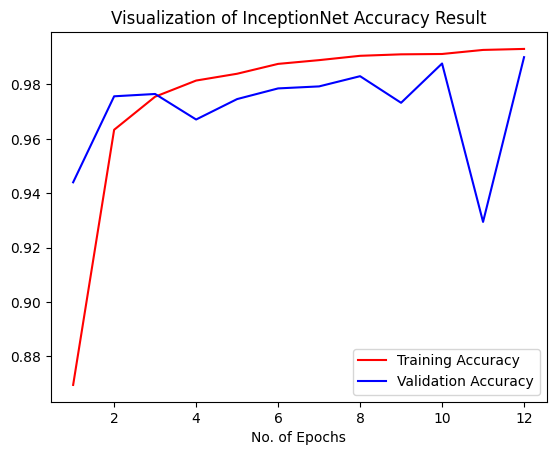

In [29]:
# Use the actual number of epochs from the history object
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot the accuracy for training and validation
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')

# Add labels, title, and legend
plt.xlabel('No. of Epochs')
plt.title('Visualization of InceptionNet Accuracy Result')
plt.legend()

# Show the plot
plt.show()


In [30]:
class_name = validation_set.class_names

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model_inception.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [40]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.99      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.99      0.99      0.99       502
                               Blueberry___healthy       1.00      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.99      0.

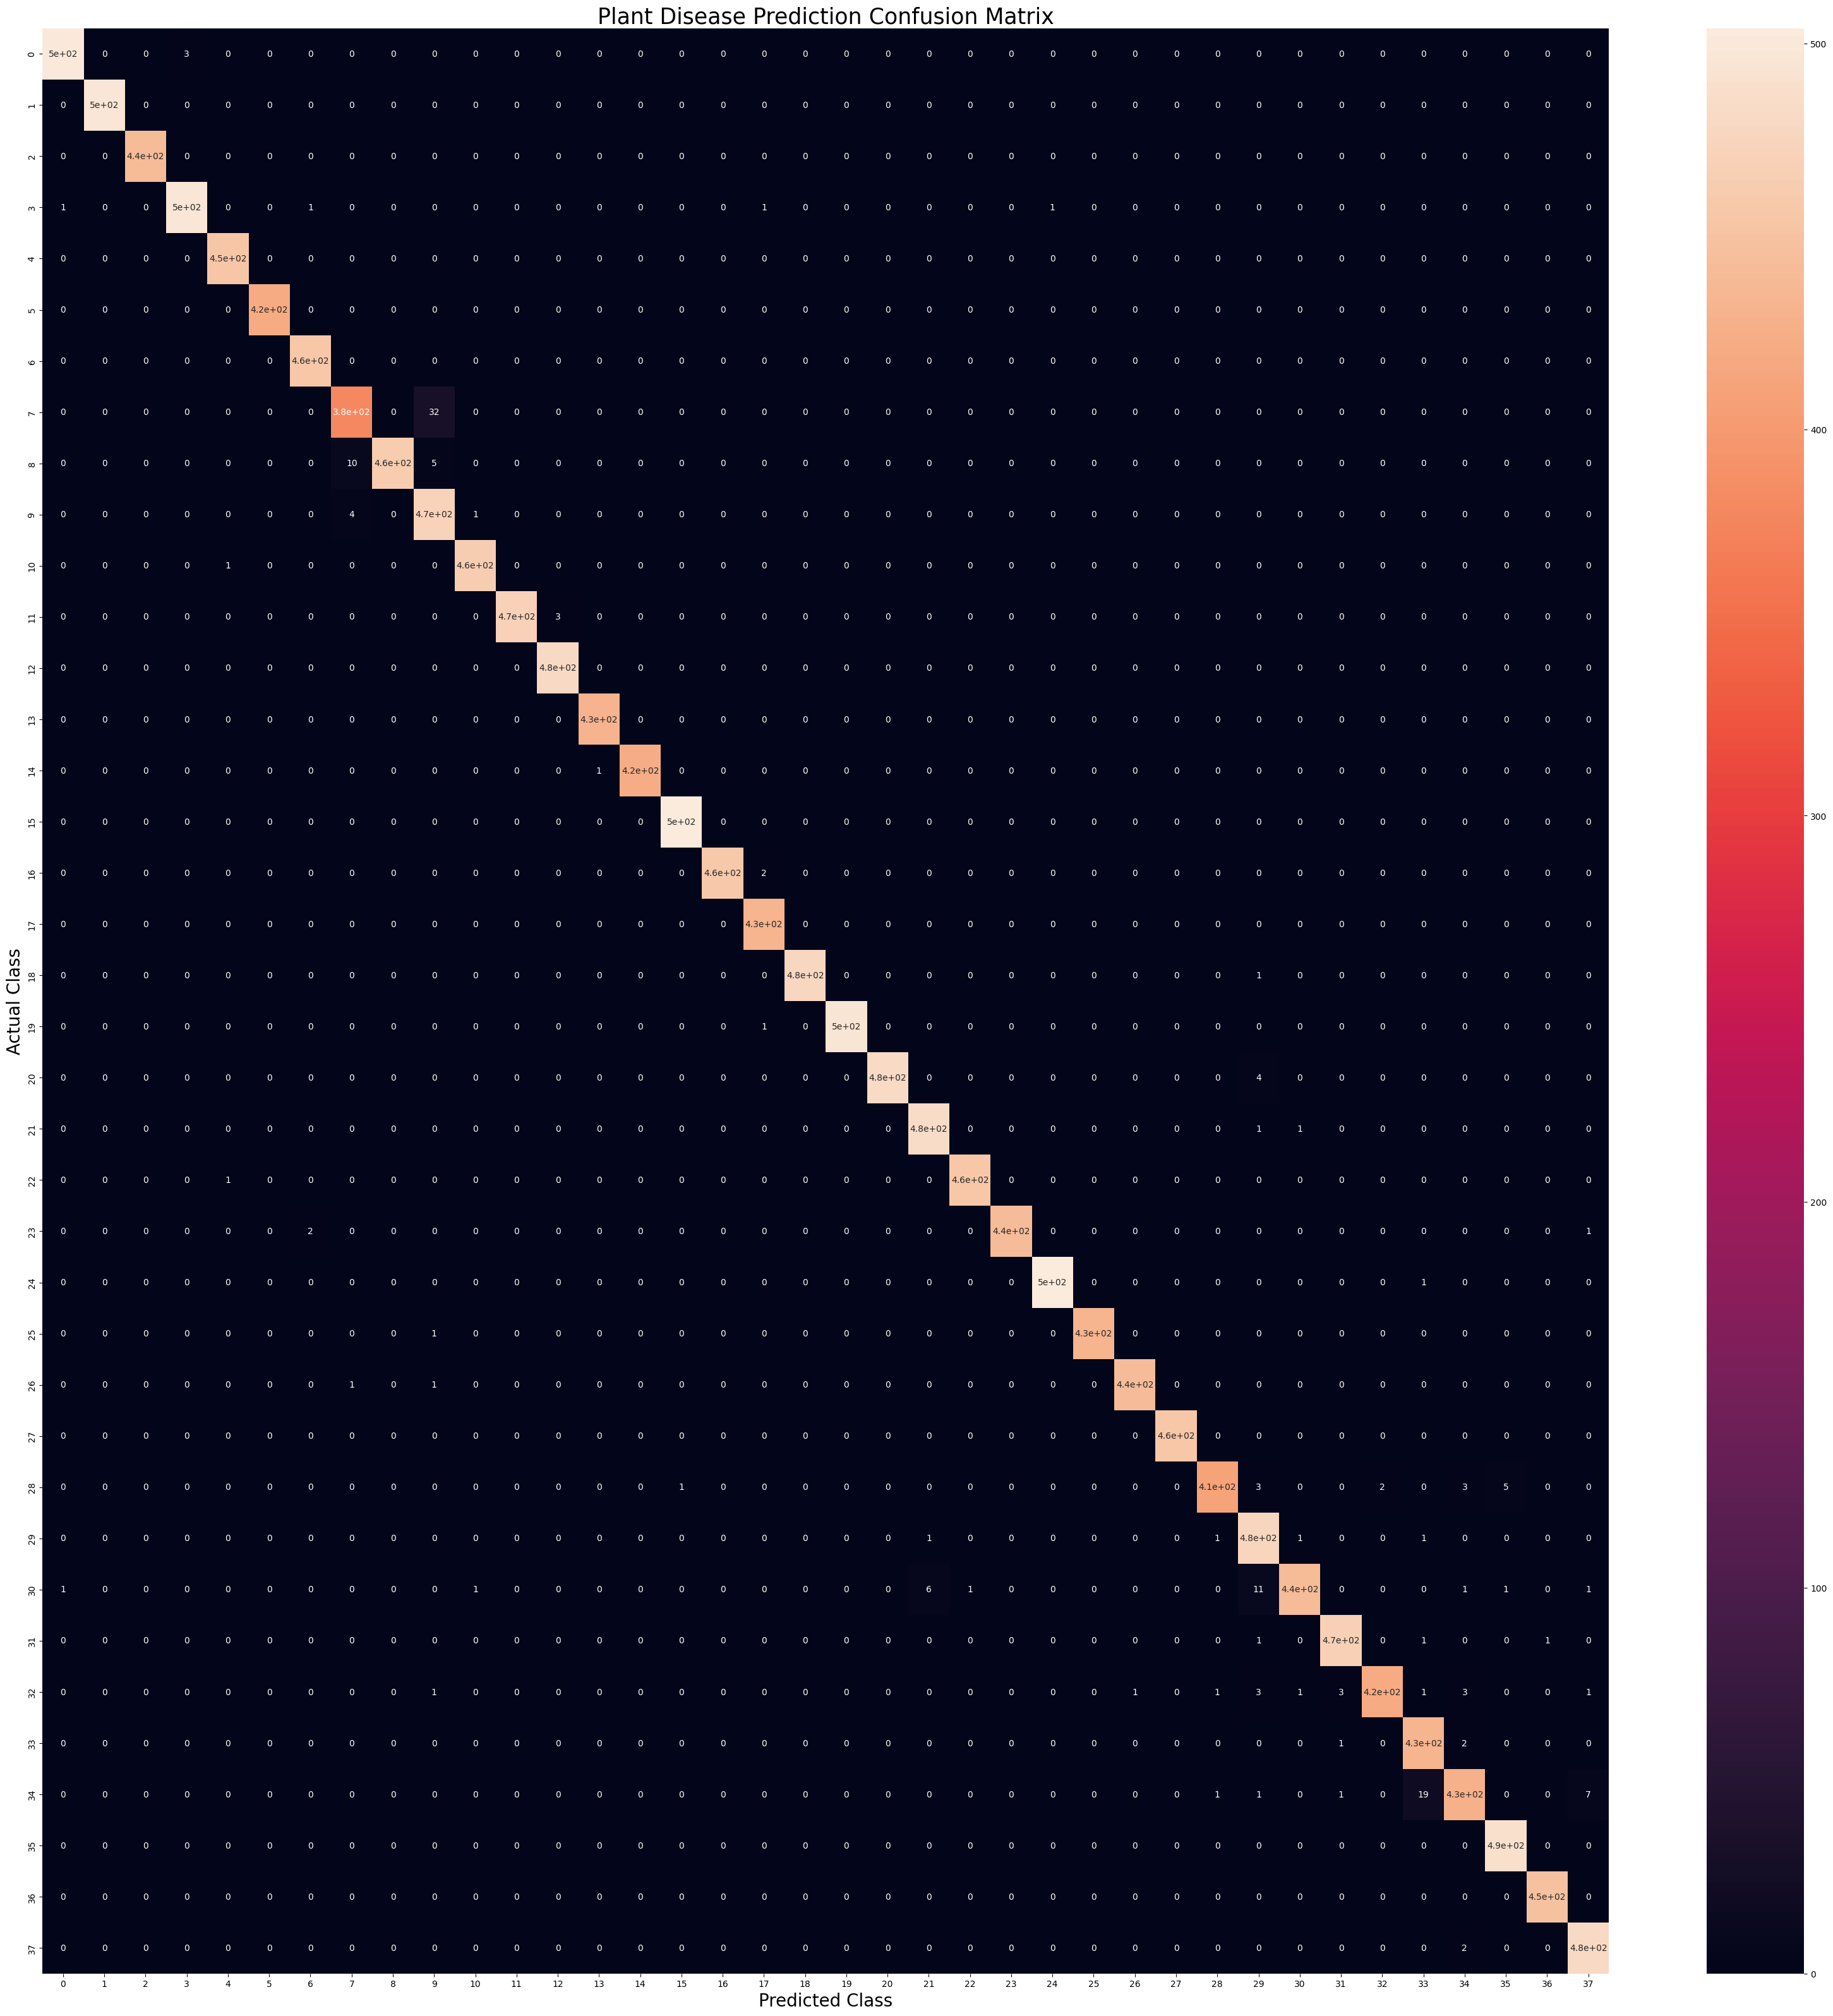

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [47]:
##Plotting the curves
# Get true labels and predicted probabilities
y_pred = model_inception.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

num_classes = len(class_name)
# True labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Convert true labels to one-hot encoding for multiclass ROC
Y_true_one_hot = label_binarize(Y_true, classes=range(num_classes))

# ROC Curve for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multiclass ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

# # Precision-Recall Curve for each class
# precision = dict()
# recall = dict()
# prc_auc = dict()
# for i in range(num_classes):
#     precision[i], recall[i], _ = precision_recall_curve(Y_true_one_hot[:, i], y_pred[:, i])
#     prc_auc[i] = auc(recall[i], precision[i])

# # Plot Precision-Recall curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Multiclass Precision-Recall Curve')
# plt.legend(loc="lower left")
# plt.show()

# Print classification report for detailed metrics
print(classification_report(Y_true, predicted_categories, target_names=class_name))


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 141s 8ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.99      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.99      0.99      0.99       502
                               Blueberry___healthy       1.00      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___No

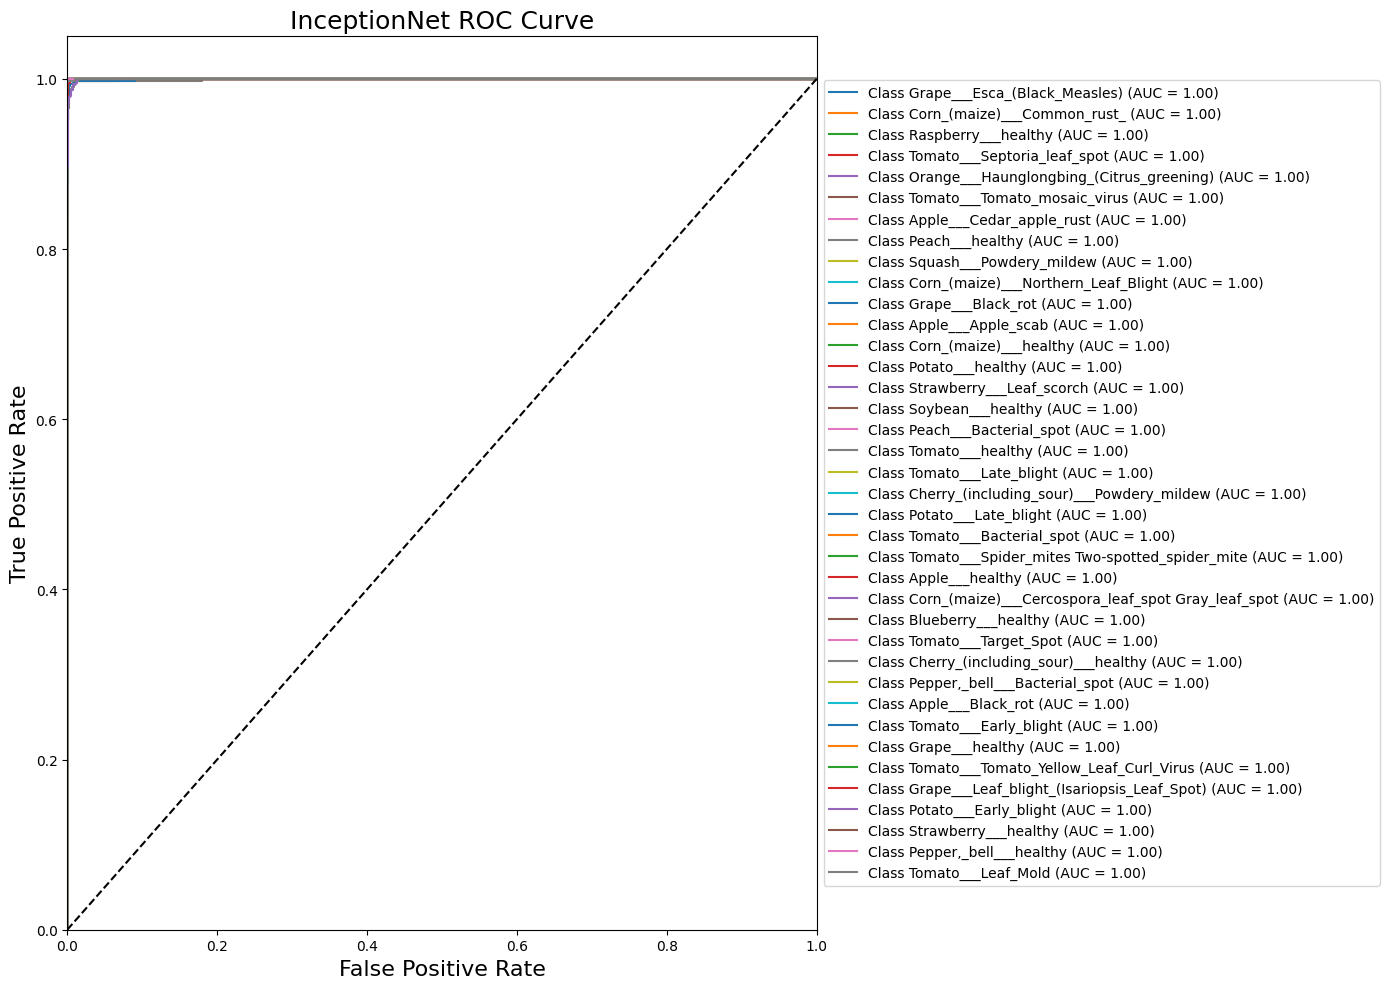

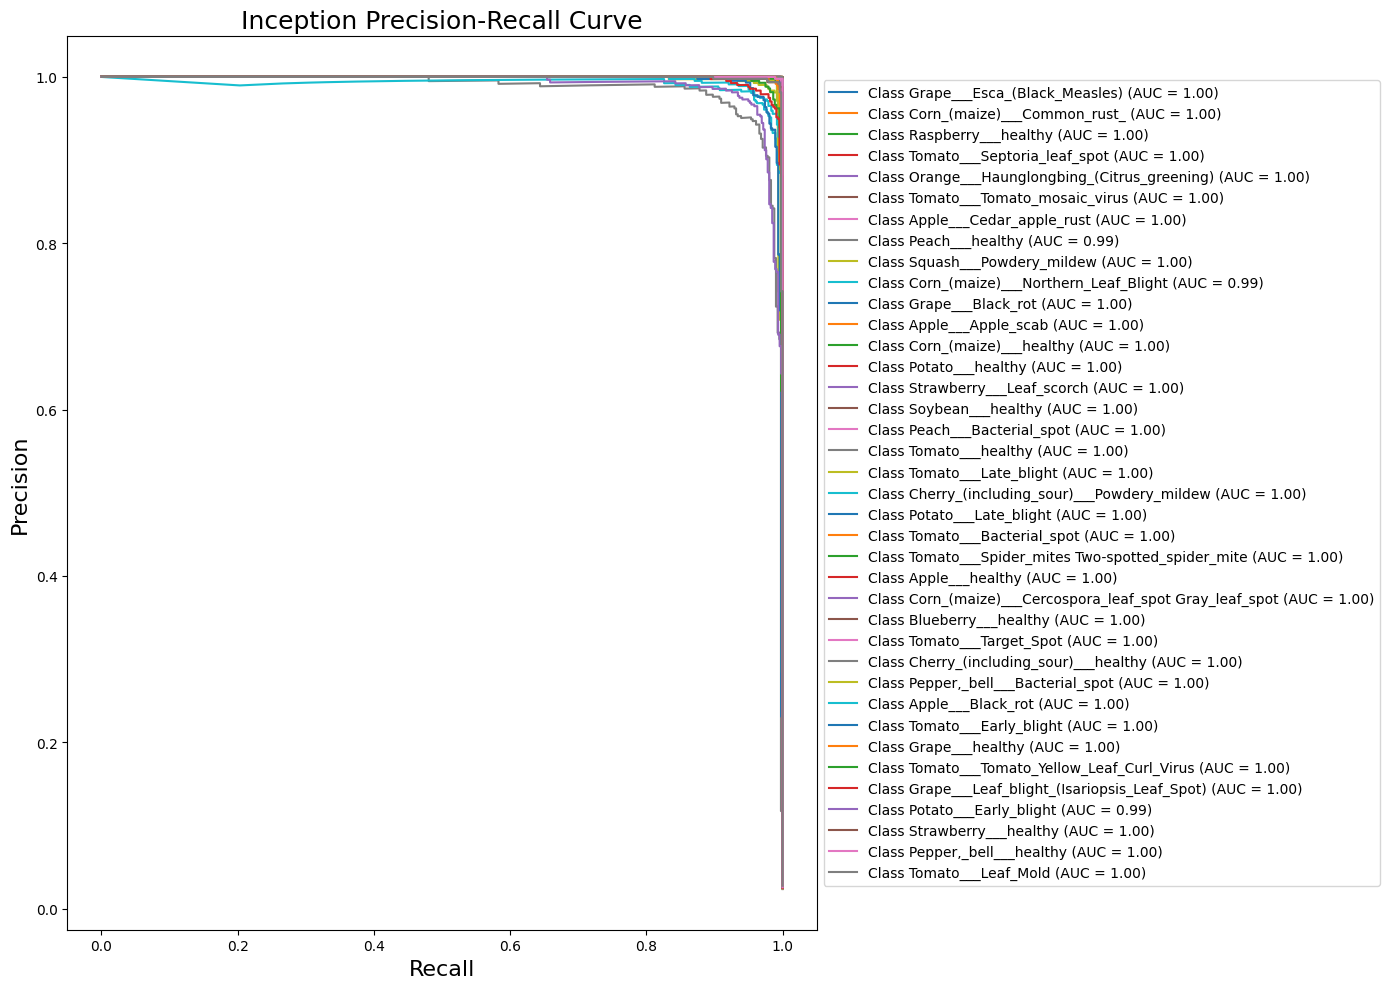

In [49]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming you have these:
# y_true: true labels
# y_pred: predicted probabilities

num_classes = len(class_names)

# Binarize the labels (one-vs-rest approach)
y_true_bin = label_binarize(Y_true, classes=range(num_classes))

# Compute precision-recall and ROC for each class
precision = dict()
recall = dict()
prc_auc = dict()  # For precision-recall curve AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])
    prc_auc[i] = average_precision_score(y_true_bin[:, i], y_pred[:, i])

    # ROC curve
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(14, 10))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('InceptionNet ROC Curve', fontsize=18)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.savefig('InceptionNet ROC Curve.png', dpi=600)
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(14, 10))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f"Class {class_names[i]} (AUC = {prc_auc[i]:.2f})")

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Inception Precision-Recall Curve', fontsize=18)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.savefig('InceptionV3 precision recall curve.png', dpi=600)
plt.show()


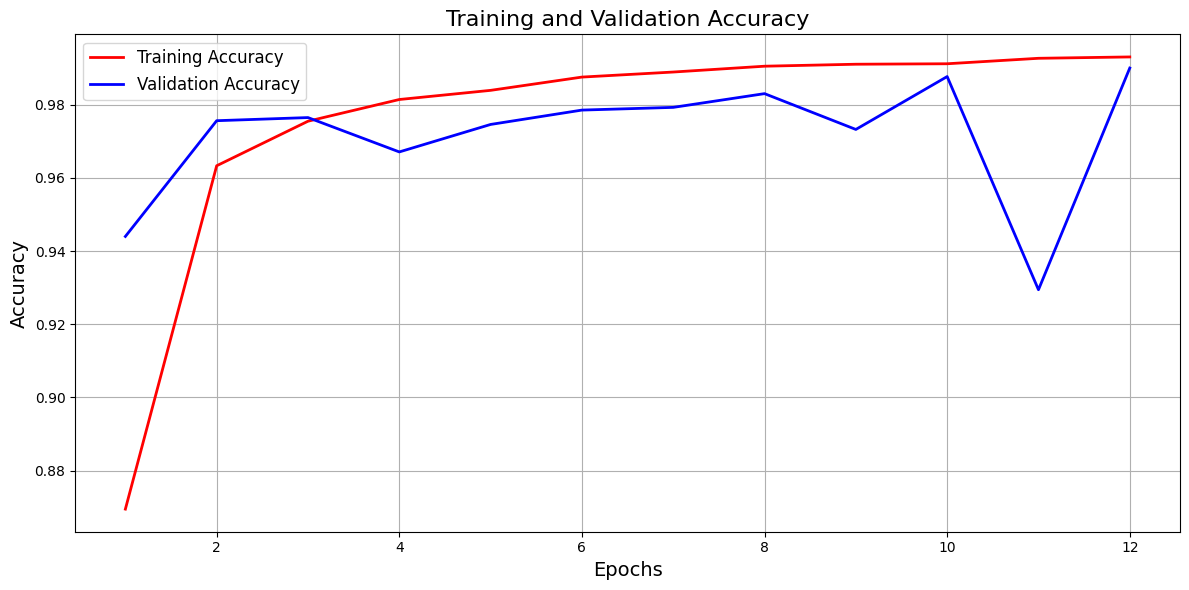

In [50]:
# Assuming training_history contains 'accuracy', 'val_accuracy', 'loss', and 'val_loss'
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, history.history['accuracy'], 'r', label='Training Accuracy', linewidth=2)
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('InceptionV3_Training_VS_Validation_Accuracy.png', dpi=600)
plt.show()




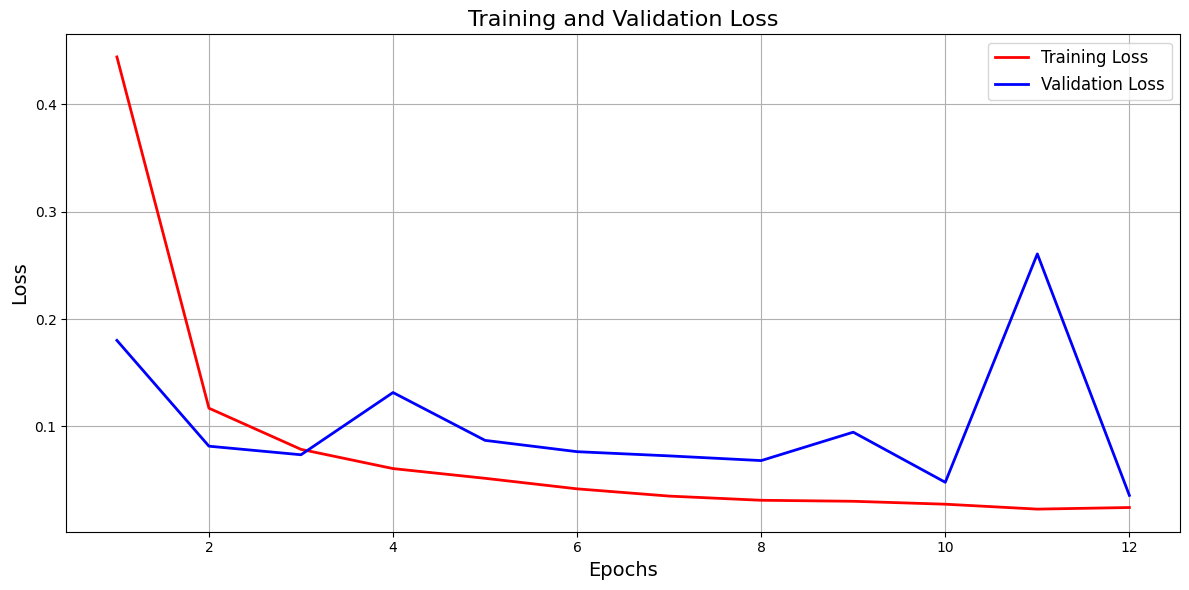

In [51]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs,history.history['loss'], 'r', label='Training Loss', linewidth=2)
plt.plot(epochs,history.history['val_loss'], 'b', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('InceptionV3_Training_VS_Validation_LOSS.png', dpi=600)
plt.show()

##Test

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [53]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

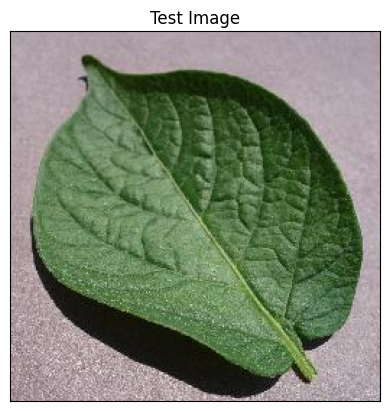

In [54]:
#Test Image Visualization
import cv2
# image_path = 'test/test/AppleCedarRust1.JPG'
image_path = '/content/test/test/PotatoHealthy1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [56]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model_inception.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [57]:
print(predictions)

[[1.40145361e-12 1.12930144e-10 2.75117646e-12 7.02366030e-12
  1.92953054e-09 6.64461596e-13 3.40578010e-09 2.77266946e-12
  4.51105570e-13 2.60404491e-13 8.88729032e-13 3.00020729e-12
  9.88047578e-12 1.90491477e-11 2.97911071e-11 1.90005078e-09
  2.00720923e-13 2.61712201e-12 5.66112678e-11 1.27885249e-08
  1.69299449e-10 5.45174544e-07 9.99999404e-01 4.91432546e-12
  3.20266230e-10 9.94442176e-15 1.72611965e-13 2.63731526e-09
  4.68317266e-14 1.34929719e-13 9.69970198e-13 9.82186771e-13
  8.21493318e-13 7.59249087e-12 2.57104171e-10 6.46238054e-13
  1.41515825e-12 7.94065855e-11]]


In [58]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


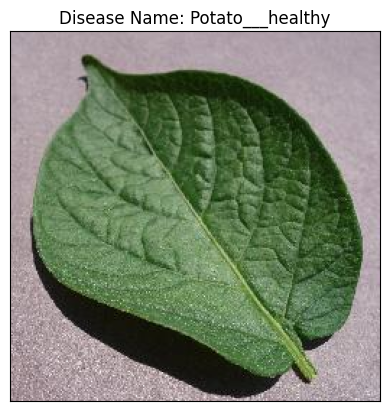

In [59]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()